Clase 2(a) - Corrección Radiométrica de Imágenes Satelitales
===========================================

### SoPI II: Herramientas de teledetección cuantitativa

En esta clase nos centraremos en la corrección radiométrica de firmas espectrales 

Se utilizara este notebook de python para ayudar en el procesamiento y la visualización de las mismas.

Los notebooks se dividen de la siguiente manera

- **(a)** Ajustar el valor mínimo del histograma a una curva $L_0\times\lambda^{-\gamma}$
- (b) Calcular los parámetros de corrección con Py6S
- (c) Graficar las firmas espectrales con varias correcciones


### Carga de librerias

Recuerde que debe ejecutar **siempre** primero la celda que carga las librerias para ejecutar los procesos.

Durante esta clase utilizaremos las librerias

- [matplotlib](http://matplotlib.org/) para generación de gráficos.
- [numpy](http://www.numpy.org/) para el procesamiento numérico y matricial.
- [scipy](http://www.scipy.org) para realizar los ajustes

Para graficar firmas espectrales con `matplotlib` debemos darle dos arrays con valores. El primero de ellos son las posiciones de `x` para el grafico y el segundo son las posiciones de `y`.

In [1]:
# Cargamos las librerais
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Fijamos que muestre los graficos dentro de la linea
%matplotlib inline

### Ajuste de firmas espectrales

Para ajustar los minimos con `scipy` debemos primero cargar los mimos para cada longitud de onda

In [2]:
# Valores de longitud de onda para landsat 8
x = np.array([482,561,655,864,1608,2200])
# Valores de reflectancia
y = np.array([8075,6626,5833,5357,5057,5033])*(2e-5)-0.1

podemos luego graficar a los mismos

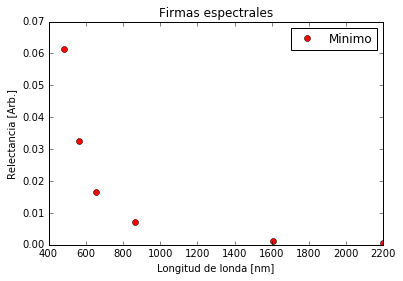

In [3]:
# Grafico
plt.plot(x,y,linestyle = "None", marker='o', color="red", label="Minimo")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesgo
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")

# Muestro el grafico
plt.show()

Si calculamos el logaritmo de la expresión anterior obtenemos

$$ \log L_{min} = -\gamma \log \lambda + \log L_0 $$

por lo tanto, si graficamos $\log L_{min}$ contra $\log \lambda$ tenemos una recta de pendiente negativa

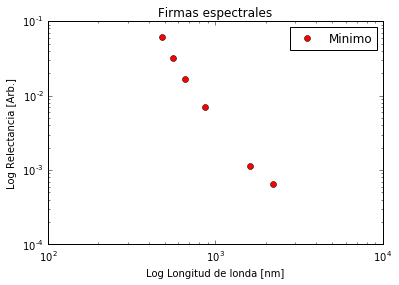

In [4]:
# Grafico
plt.loglog(x,y,linestyle = "None", marker='o', color="red", label="Minimo")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesgo
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Log Longitud de londa [nm]")
plt.ylabel("Log Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")

# Muestro el grafico
plt.show()

para hacer el ajuste, utilizaremos la funcion linregress de scipy como `stats.linregress()` donde los valores de `x` y de `y` serán los correspondientes logaritmos. Mostramos luego los valores obtenidos

In [5]:
# Hago el ajuste
# Ajustamos log x ~ log y
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x),np.log(y))
# Calculamos los errores
mx = x.mean()
sx2 = ((x-mx)**2).sum()
sd_intercept = std_err * np.sqrt(1./len(x) + mx*mx/sx2)
sd_slope = std_err * np.sqrt(1./sx2)
# {:1f} escribe un numero decimal con 1 decimal
# Muestro los valores obtenidos
print("γ:   {:.1f} ± {:.1f}".format(-slope,sd_slope))
print("L₀: {:.1f} ± {:.1f}".format(intercept,sd_intercept))

γ:   3.0 ± 0.0
L₀: 15.4 ± 0.1


por lo tanto podemos calcular los valores ajustados como y mostrarlos como

In [6]:
# Calculo el ajuste de valores a x
z = np.exp(intercept) * x ** (slope)

para mostrarlos, crearemos una pequeña tabla usando un ciclo `for` en todos los valores

In [7]:
# Imprimimos la tabla de valores obtenidos
print("  λ[nm]  ρ[arb.]")
print("----------------")
# \t incerta un tabulador
for i in range(len(x)):
    print("{:6d} \t  {:0.3f}".format(x[i],z[i]))

  λ[nm]  ρ[arb.]
----------------
   482 	  0.049
   561 	  0.031
   655 	  0.020
   864 	  0.009
  1608 	  0.001
  2200 	  0.001


Graficamos los valores obtenidos y los valores ajustados

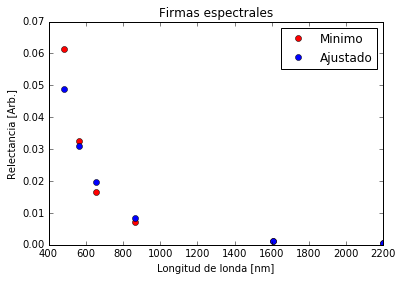

In [8]:
# Grafico
plt.plot(x,y,linestyle = "None", marker='o', color="red", label="Minimo")
plt.plot(x,z,linestyle = "None", marker='o', color="blue", label="Ajustado")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesgo
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")

# Muestro el grafico
plt.show()

O en un grafico `log-log`

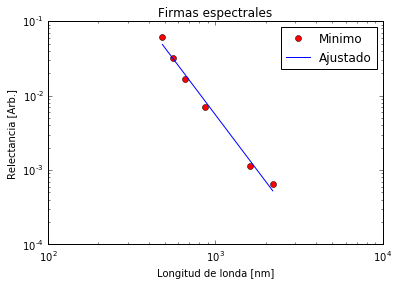

In [9]:
# Grafico
plt.loglog(x,y,linestyle = "None", marker='o', color="red", label="Minimo")
plt.loglog(x,z,linestyle = "-", marker='None', color="blue", label="Ajustado")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesgo
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")

# Muestro el grafico
plt.show()